# Categorical Variables and One Hot Encoding (HOME prices in USA)

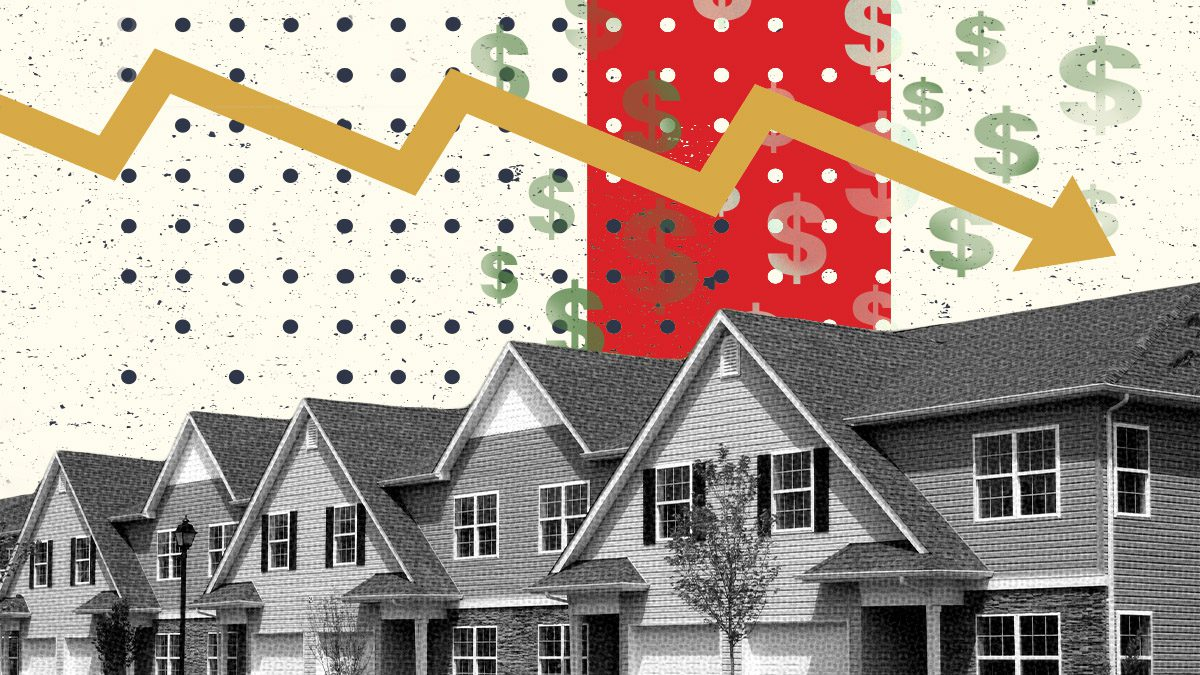

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [10]:
# import csv file 
data = pd.read_csv("Home IN USA.csv")
df= pd.DataFrame(data)
df.columns=["town","area","price"]
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# using dummies from pandas

A dummy variable is a variable that takes values of 0 and 1

 will use integer encoding or label encoding where you convert name of the town
to aspesific integer number 

#dealing with nominal categorical (don't have the numeric ordaring)

#variables and simple integer encoding is going to work hence we are going to use atechnique called one hot encoding  

hot encoding works is you create anew colume for each of your categories and assign binary value of --->one or zero  

In [11]:
# create dummy variable columns 
# dumies which will return the dummy variable columns 
dummies =pd.get_dummies(df["town"])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [18]:
# concatenate this dummy"s dataframe with my original dataframe 
merged = pd.concat([df,dummies] , axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


#drop the original town columns here because already have these dummy variable columns

#you  don't need this  text columns anyway that's gonna work on our linear regression model 


In [21]:
final = merged.drop(['town'] , axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


# Dummy Variable Trap

Dummy encoding also uses dummy (binary) variables. Instead of creating a number of dummy variables that is equal to the number of categories (k) in the variable, dummy encoding uses k-1 dummy variables.

To avoid dummy variable trap we should always add one less (n-1) dummy variable

 we want to do is drop one of these dummy variable column now (dummy variable trap)
 
 if you have five  dummy variables let's say  you drop one and you are left with four
 
 we have three dummy variables here so we are just going to drop one 


In [24]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [25]:
y =  final .price


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [26]:
# create linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

 give x and y for training so what is my 
 
x is all col exept the price (depentant variable)

 y is the price 

In [34]:
X = final.drop('price' , axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [35]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [37]:
# training model
model.fit(X,y)

LinearRegression()

In [42]:
# 2800 sqr ft home in robinsville
model.predict([[2800,0,1]])

C:\Users\Amr mohamed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [43]:
# 3400 sqr ft home in west windsor
model.predict([[3400,0,0]]) 

C:\Users\Amr mohamed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [44]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

C:\Users\Amr mohamed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [45]:
# if you want to know how accurate your model is you can use 
# calc for all of the rows in x & then compare predictor value with the actual value(y)
model.score(X,y)

0.9573929037221871

# Using sklearn labelencoder

In [46]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


First step is to use label encoder to convert town names into numbers

In [47]:
# use label encoder from sklearn (craete model)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
# label encoder to fit and transform 
# fit and transform means (takes the label columns as an input )
# then convert it  then return the label (0,1,2)
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [53]:
# create x variable (x is atraining data set , y is dependant variable )
x = dfle[["town" ,"area"]].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [102]:
y= dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

# Using sklearn oneHotEncoder

In [103]:
#Now use one hot encoder to create dummy variables for each of the town
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [104]:
# all x columns to be categorical variable

X = ct.fit_transform(x)
X


array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [105]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [106]:
# traing my model
model.fit(X,y)

LinearRegression()

In [107]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [108]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [110]:
# if you want to know how accurate your model is you can use
model.score(X,y)

0.9573929037221873